In [1]:
from network import *
from inference import *
import numpy as np
from tools import *
from os import listdir
import pandas as pd

%load_ext autoreload
%autoreload 2

## Network generation is not reproducible for some reason!

### 3553386411, 315917623: final loss=0.1052733126064506, acc_u=-0.011476652840953498, acc_v=-0.009711150599327518, AUC_Q=0.19103727525930866

In [3]:
network_seed, inference_seed = 3553386411, 315917623

In [5]:
T = 50
K_aff = 3
K_exp = 9

In [6]:
in_folder = "../data/input/synth/"
out_folder = "../data/output/synth/"

file = f"{network_seed}_{T}_{K_exp}"

In [8]:
data = read_data(in_folder, file)
params = np.load(in_folder + f"params_{network_seed}_{T}_{K_exp}.npz")
u, mu, Z = params["u"], params["mu"], params["Z"]

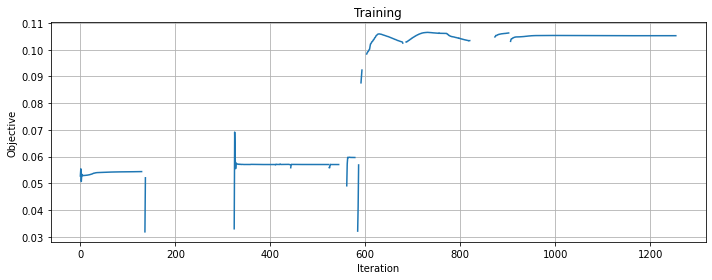

In [9]:
training = f"training_{network_seed}_{T}_{K_exp}_Exp_{inference_seed}_None.npz"
losses = np.load(out_folder + training)["losses"]
plot_losses(losses)

In [28]:
losses, params = fit(data, K_aff=K_aff, K_exp=K_exp, seed=inference_seed, exp=True)

running Exp inference for 15000 iterations: 



/home/jschulz/DynamicExposure/src/inference.py:53: RuntimeWarning: divide by zero encountered in true_divide
  entropy = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q)))
/home/jschulz/DynamicExposure/src/inference.py:53: RuntimeWarning: invalid value encountered in multiply
  entropy = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q)))


Convergence Criterium satisfied
Exposure inference with T=50, N=100, K=3 and 6411 iterations took 560.261694013001 seconds



In [29]:
mu_est, Q, u_est, v_est, w_est = params[0], params[1], params[2], params[3], params[4]
losses, theta_errors, exp_errors = losses

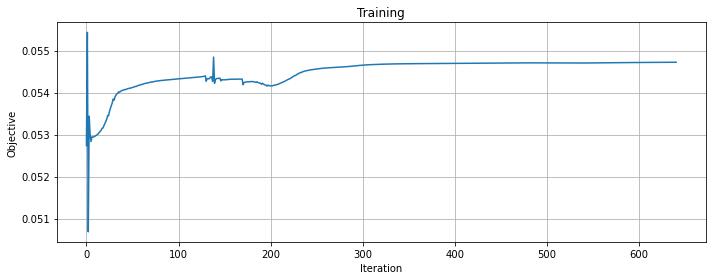

In [30]:
plot_losses(losses)

In [31]:
acc_mu = evaluate_memberships(mu, mu_est, mu, mu_est)[0]
AUC_Q = calculate_AUC(Z, Q)
acc_u, acc_v, _, _ = evaluate_memberships(u, u_est, u, v_est)

In [32]:
print(f"acc_mu={acc_mu}, acc_u={acc_u/2 + acc_v/2}, acc_Z={AUC_Q}")

acc_mu=0.5766137226810809, acc_u=0.776493520312485, acc_Z=0.826768512312442


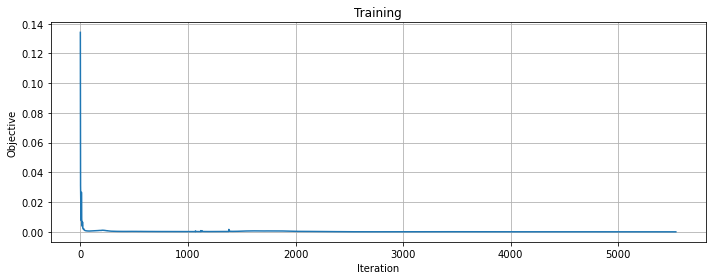

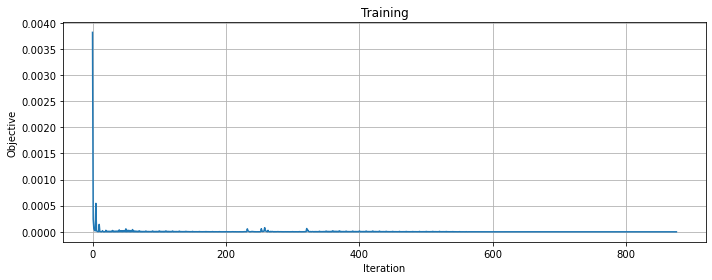

In [33]:
plot_losses(theta_errors)
plot_losses(exp_errors)

In [39]:
inf_params = np.load(out_folder + f"params_{network_seed}_{T}_{K_exp}_Exp_{inference_seed}_None.npz")
mu_exp, Q_exp, u_exp, v_exp = inf_params["mu"], inf_params["Q"], inf_params["u"], inf_params["v"]

In [40]:
acc_mu = evaluate_memberships(mu, mu_exp, mu, mu_est)[0]
AUC_Q = calculate_AUC(Z, Q_exp)
acc_u, acc_v, _, _ = evaluate_memberships(u, u_exp, u, v_exp)

In [41]:
print(f"acc_mu={acc_mu}, acc_u={acc_u/2 + acc_v/2}, acc_Z={AUC_Q}")

acc_mu=0.6842303377004947, acc_u=-0.010593901720140509, acc_Z=0.19103727525930866
